# Lab 7 - Performance Metrics for Classification Problems

### Introduction
In this lab we are going assess the performance of a classification model on the MNIST dataset by conducting an in-depth evaluation that includes Exploratory Data Analysis (EDA), model training, validation, and testing.

In [70]:
import numpy as np

# plotting modules
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows
import seaborn as sns

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# The classifiers we will use in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# cross validation functions
from sklearn.model_selection import cross_validate, cross_val_predict

# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

### Obtaining the data

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

### Exploring the Data  

Source [Kaggle - Unsupervised Learning for MNIST with EDA](https://www.kaggle.com/code/manabendrarout/unsupervised-learning-for-mnist-with-eda)

In [4]:
type(mnist)

sklearn.utils._bunch.Bunch

This is the type that is similar to python dictionary with Key Value pair.

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Here we can see the Keys that are included for our dataset.

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
print(f'Data Shape: {mnist.data.shape}')
print(f'Target Shape: {mnist.target.shape}')

Data Shape: (70000, 784)
Target Shape: (70000,)


Here we get an idea about the data and target in the mnist dataset.

In [12]:
# Renaming the data and target
X = mnist.data
y = mnist.target

In [14]:
# Function to plot the image from the MNIST dataset
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

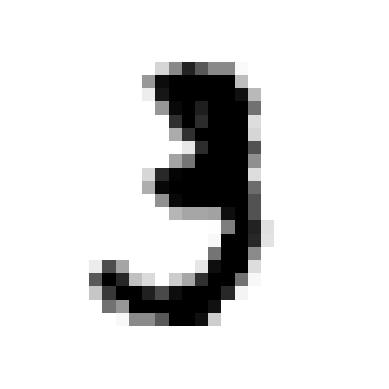

Label for the 10th image: 3


In [21]:
# Exploring the 10th image from the dataset
some_digit = X[10]
plot_digit(some_digit)
plt.show()

# Target for the 10th image
print(f'Label for the 10th image: {y[10]}')


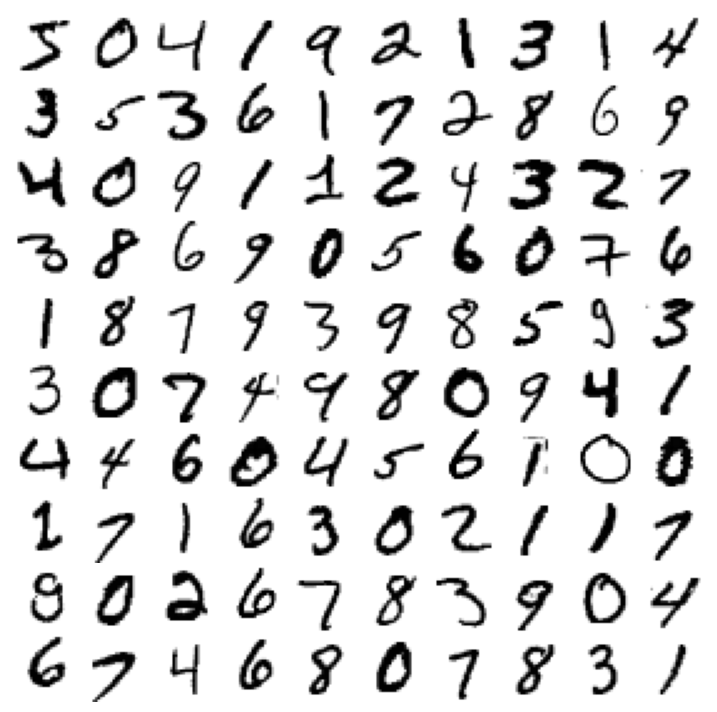

In [23]:
# Plotting the first 100 image
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

From this observation we get a clear idea about the dataset that we are working on. This dataset consists of a large collection of handwritten digits, specifically digits from 0 to 9. Each digit image is grayscale and has a fixed size of 28x28 pixels.

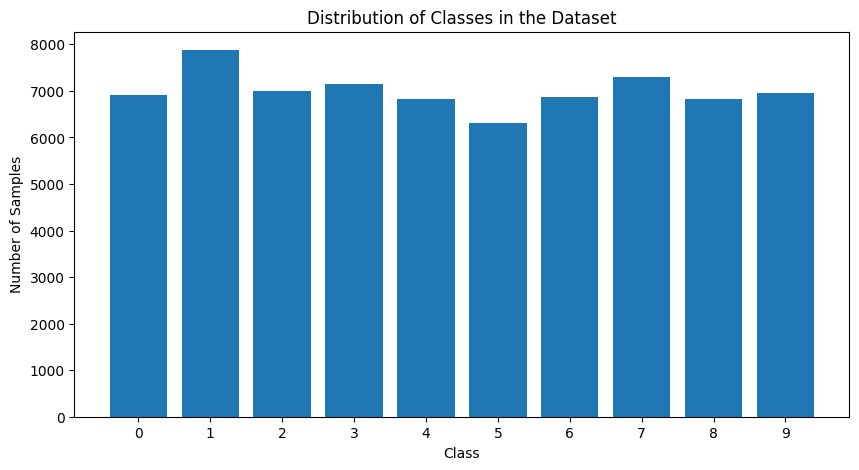

In [28]:
# Distribution of classes
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(10, 5), facecolor='white')
plt.bar(unique, counts)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(unique)
plt.show()

Here, we are see the actual distribution of the different classes in the dataset. Puts in more idea about the MNIST dataset.

Filtered images shape: (28911, 784)
Filtered labels shape: (28911,)


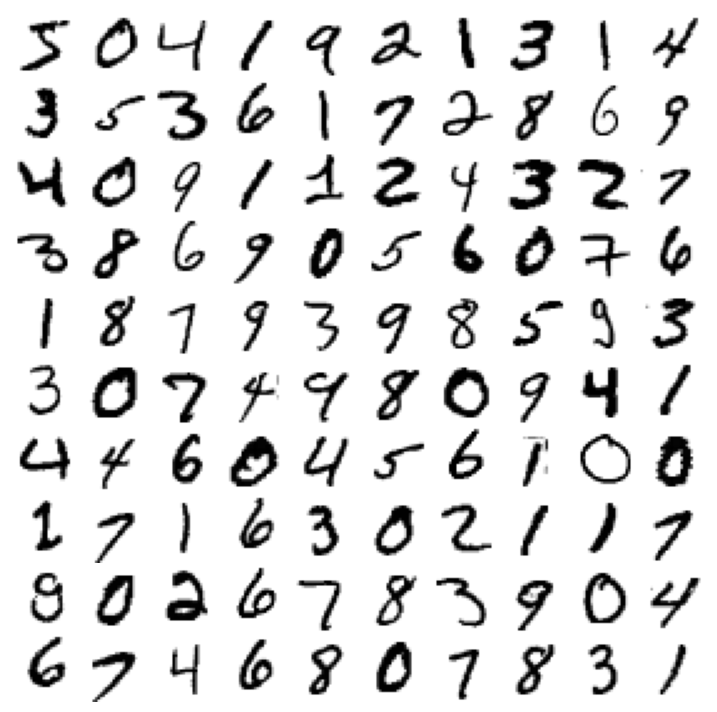

| False || True || False || True || False || True || True || True || True || False |
| True || False || True || False || True || False || True || False || False || False |
| False || True || False || True || True || True || False || True || True || False |
| True || False || False || False || True || False || False || True || False || False |
| True || False || False || False || True || False || False || False || False || True |
| True || True || False || False || False || False || True || False || False || True |
| False || False || False || True || False || False || False || True || True || True |
| True || False || True || False || True || True || True || True || True || False |
| False || True || True || False || False || False || True || False || True || False |
| False || False || False || False || False || True || False || False || True || True |


In [55]:
# Filter the dataset for the first 4 classes (0 to 3)
train_filter = np.isin(y, ['0', '1', '2', '3'])

# Applying the filter
target_images = X[train_filter]
target_labels = y[train_filter]


# Checking the shapes of the filtered datasets
print('Filtered images shape:', target_images.shape)
print('Filtered labels shape:', target_labels.shape)

# Validating the target objects and feature objects

# Plotting the first 100 image
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


elements_per_row = 10
# Print the elements
for i in range(0, 100, elements_per_row):
    row_str = ''
    for x in train_filter[i:i+elements_per_row]:
        if x:
            row_str += '| True |'
        else:
            row_str += '| False |'
    print(row_str)


We have selected the classes 0 to 3, total of 4 classes and also validated to see if the target object and feature objects are aligned or not.

In [58]:
# Split the dataset into train-validation-test sets
X_train, X_temp, y_train, y_temp = train_test_split(target_images, target_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


### Training the Model

Here we are using logistic regression model as our classifier.

Source: [Kaggle - Digit Recognizer](https://www.kaggle.com/code/ankurchanda/digit-recognizer) 

In [123]:
# Model
model = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(X_train, y_train)

d:\ClassNotes\AIML\Labs\FMLF\CSCN8010-Labs\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Evaluate model over validation data

In [66]:
# Evaluation on the validation dataset
y_val_pred = model.predict(X_val)

**Evaluation Metrics for Classification Model**  


Evaluation metrics including accuracy, confusion matrix, precision, recall, and F1-score are computed for a classification model to assess its performance on validation data.

In [100]:
# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\n")

# Calculate precision, recall, and F1-score for each class separately
precision_per_class = precision_score(y_val, y_val_pred, average=None)
recall_per_class = recall_score(y_val, y_val_pred, average=None)
f1_per_class = f1_score(y_val, y_val_pred, average=None)

# Print precision, recall, and F1-score for each class
for i in range(4):
    print(f"Class {i}:")
    print(f"  Precision: {precision_per_class[i]}")
    print(f"  Recall: {recall_per_class[i]}")
    print(f"  F1-score: {f1_per_class[i]}")
    print()

Accuracy: 0.948351394973484

Confusion Matrix:
[[1001    1   16    9]
 [   2 1148   18   12]
 [  25   11  951   47]
 [  12   21   50 1013]]


Class 0:
  Precision: 0.9625
  Recall: 0.9746835443037974
  F1-score: 0.9685534591194969

Class 1:
  Precision: 0.9720575783234547
  Recall: 0.9728813559322034
  F1-score: 0.9724692926725963

Class 2:
  Precision: 0.9188405797101449
  Recall: 0.9197292069632496
  F1-score: 0.9192846785886901

Class 3:
  Precision: 0.937095282146161
  Recall: 0.9242700729927007
  F1-score: 0.930638493339458



From this we get the model accuracy as 94% so the overall model perform well and only classes 2 and 3 have more misclassification, this shows that the model have been getting confused with the class 2 and class 3.


**Precision-Recall Curve Analysis for Class 0**

d:\ClassNotes\AIML\Labs\FMLF\CSCN8010-Labs\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


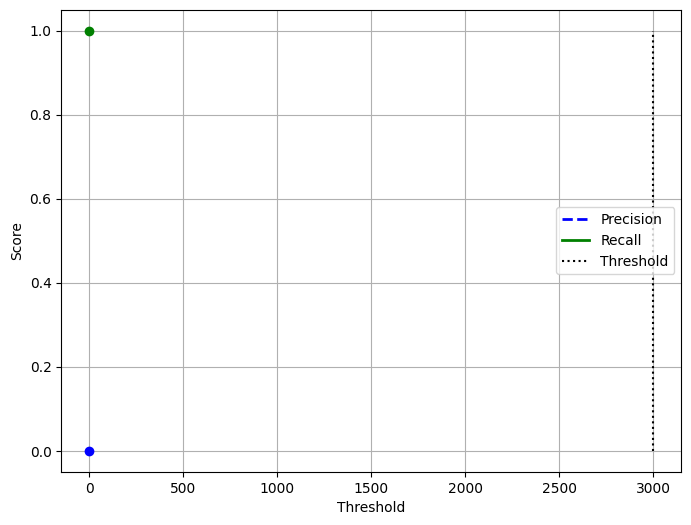

In [119]:
# Calculate predicted probabilities for the chosen class
probas = model.predict_proba(X_val)
chosen_class = 0 
probas_chosen_class = probas[:, chosen_class]

# Calculate precision and recall for the chosen class
precision, recall, thresholds = precision_recall_curve(y_val == chosen_class, probas_chosen_class)

# Plot precision and recall as a function of the threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(3000, 0, 1.0, "k", "dotted", label="Threshold")
idx = np.argmax(thresholds >= 3000)  # Find the index where threshold >= 3000
plt.plot(thresholds[idx], precision[idx], "bo")
plt.plot(thresholds[idx], recall[idx], "go")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="center right")
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

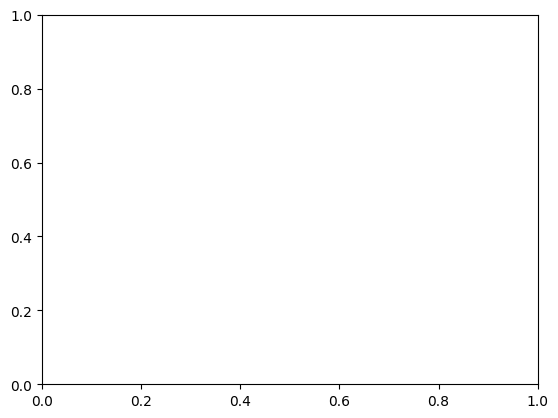

In [122]:
# Convert dictionaries to lists
recalls_list = list(recalls.values())
precisions_list = list(precisions.values())

plt.plot(recalls_list, precisions_list, linewidth=2, label="Precision/Recall curve")
plt.plot([recalls_list[idx], recalls_list[idx]], [0., precisions_list[idx]], "k:")
plt.plot([0.0, recalls_list[idx]], [precisions_list[idx], precisions_list[idx]], "k:")
plt.plot([recalls_list[idx]], [precisions_list[idx]], "ko", label="Point at threshold 3,000")
plt.gca().add_patch(plt.Arrow(0.79, 0.60, -0.18, 0.18, width=0.02, color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()


### Increasing Precision Without Retraining

In [93]:


# The chosen class is class 2
chosen_class = '2'

# Compute predicted probabilities for the chosen class
chosen_class_probs = model.predict_proba(X_val)[:,2] 

# Define a higher threshold to increase precision
new_threshold = 0.5 

# Adjust predictions based on the new threshold
adjusted_predictions = (chosen_class_probs >= new_threshold).astype(int)

# Calculate precision with adjusted predictions
adjusted_precision = precision_score((y_val == chosen_class).astype(int), adjusted_predictions)
print("Adjusted Precision for Class", chosen_class, ":", adjusted_precision)


Adjusted Precision for Class 2 : 0.9188405797101449


This can completed by assuming a class and getting model prediction to adjust the prediction value with threshold to find the precision score.

### Evaluate over Test Data

In [98]:
# Evaluation on the validation dataset
y_test_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print('\n')

# Calculate precision, recall, and F1-score for each class separately
precision_test = precision_score(y_test, y_test_pred, average=None)
recall_test = recall_score(y_test, y_test_pred, average=None)
f1_test = f1_score(y_test, y_test_pred, average=None)

# Print precision, recall, and F1-score for each class
for i in range(4):
    print(f"Class {i}:")
    print(f"  Precision: {precision_test[i]}")
    print(f"  Recall: {recall_test[i]}")
    print(f"  F1-score: {f1_test[i]}")
    print()

Accuracy: 0.9462762278072401

Confusion Matrix:
[[1018    0   13   14]
 [   2 1113   25   11]
 [  19   26  987   46]
 [  10   19   48  986]]


Class 0:
  Precision: 0.9704480457578646
  Recall: 0.9741626794258373
  F1-score: 0.9723018147086915

Class 1:
  Precision: 0.961139896373057
  Recall: 0.9669852302345786
  F1-score: 0.964053702901689

Class 2:
  Precision: 0.9198508853681268
  Recall: 0.9155844155844156
  F1-score: 0.9177126917712692

Class 3:
  Precision: 0.9328287606433302
  Recall: 0.9275634995296331
  F1-score: 0.9301886792452831



From the above we can conclude that overall all the models are performing equally good but taking into consideration for improvement for the model, the last classes 2 and 3 performs a bit off from the other classes. 